# Лабораторная работа №4 (Методы решения СЛАУ)
---
## Работу выполнили:
Обиджанов Алишер<br>
Кузнецов Павел<br>
Казаков Андрей<br>

[*Сслыка на репозиторий*](https://github.com/Iamnotagenius/Primat)

---
### Метод Гаусса с выбором ведущего элемента для решения СЛАУ:
#### Теория:

Пусть исходная система уравнений имеет следующий вид:

$$\begin{cases}
        &a_{11}*x_1+\dots+a_{1n}*x_n=b_1\\
        &\dots\\
        &a_{m1}*x_1+a_{mn}*x_n=b_m
    \end{cases}$$

Напишем исходную систему уравнений в виде матрицы:

$$A=\begin{pmatrix}
    a_{11} & \dots & a_{1n}\\
    \vdots & \dots & \vdots\\
    a_{m1} & \dots & a_{mn}
\end{pmatrix}, b = \begin{pmatrix}
    b_1\\
    \vdots\\
    b_m
\end{pmatrix}$$

Матрица A называется основной матрицей и представляет собой записанные по порядку коэффициенты при переменных, а называется столбцом её свободных членов. Матрица A, записанная через черту со столбцом свободных членов называется расширенной матрицей:

$$A=\begin{matrix}
    a_{11} & \dots & a_{1n}\\
    \vdots & \dots & \vdots\\
    a_{m1} & \dots & a_{mn}
\end{matrix}\Bigg| \begin{matrix}
    b_1\\
    \dots\\
    b_m
\end{matrix}$$

$$\begin{cases}
        &a_{1j_1}*x_{j_1} + a_{1j_2}*x_{j_2} \dots + a_{1j_r}*x_{j_r}+\dots a_{1j_n}*x_{j_n}=\beta_1\\
        &a_{2j_2}*x_{j_2} \dots + a_{2j_r}*x_{j_r} + \dots a_{2j_n}*x_{j_n} = \beta_2\\
        &\dots\\
        &a_{rj_r}*x_{j_r}+ \dots a_{rj_n} * x_{j_n} = \beta_r\\
        &0=\beta(r+1)\\
        &\dots\\
        &0=\beta_m
    \end{cases}$$

Матрица, полученная из коэффициентов преобразованной системы уравнения (1) называется ступенчатой, вот так обычно выглядят ступенчатые матрицы:

$$A = \begin{matrix}
    a_{11} & a_{12} & a_{13}\\
    0 & a_{22} & a_{23} \\
    0 & 0 & a_{33}
\end{matrix}\Bigg| \begin{matrix}
b_1\\
b_2\\
b_3
\end{matrix}$$

Для этих матриц характерен следующий набор свойств:
1. Все её строки стоят после ненулевых
2. Если некоторая строка матрицы с номером k не нулевая, то в предыдущей строчке этой же матрицы нулей менбше, чем в этой, обладающей номером .

После получения ступенчатой матрицы необходимо подставить полученные переменные в оставшиеся уравнения (начиная с конца) и получить оставшиеся значения переменных.

#### Код:

In [18]:
import numpy as np

# В качестве A и B должна быть матрица А вида: np.array([[1, 2, 3, ...], [...], [...], ...])
# и столбец B свободных членов вида: np.array([1, 2, 3, ...])
def gaussMethod(A, b):
    n = len(b)
    for i in range(n):
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        for k in range(i, n):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp
        tmp = b[maxRow]
        b[maxRow] = b[i]
        b[i] = tmp

        for k in range(i + 1, n):
            c = -A[k][i] / A[i][i]
            for j in range(i, n):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]
            b[k] += c * b[i]

    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = b[i]
        for j in range(i + 1, n):
            x[i] -= A[i][j] * x[j]
        x[i] /= A[i][i]

    return x



### Алгоритм LU-разложения
#### Теория:

Если известно LU-разложение матрицы $A$, $A=LU$, исходная система может быть записана как: $LUx=b$

Эта система может быть решена в два шага. На первом шаге решается система: $Ly=b$

Поскольку L- нижняя треугольная матрица, эта система решается непосредственно прямой подстановкой.

На втором шаге решается системма: $Ux=y$

Поскольку $U$ - верхняя треугольная матрица, эта система решается обратной подстановкой

**Алгоритм:**
Для каждого столбца $j=1\dots n$ матрицы L будем вычислять l_{i,j} как:
$$l_{i,j}=\frac{u_{j,j}}{u_{i,j}}$$

Для каждой строки $c_i$ вычислим $c_i=c_i-l_{i,j}*c_i$ (Выполняем, пока j<=3)


#### Код:

In [19]:
import scipy.sparse as sp

def lu_decomposition(A):
    n = len(A)
    L = [[0.0] * n for i in range(n)]
    U = [[0.0] * n for i in range(n)]
    
    for i in range(n):
        L[i][i] = 1.0
        for j in range(i+1):
            s1 = sum(L[i][k] * U[k][j] for k in range(j))
            U[i][j] = A[i][j] - s1
        for j in range(i, n):
            s2 = sum(L[j][k] * U[k][i] for k in range(i))
            L[j][i] = (A[j][i] - s2) / U[i][i]
    return L, U

def solve_system(b, L, U):
    # Решаем систему L y = b методом прямого хода
    n = len(b)
    y = [0] * n
    for i in range(n):
        sum = 0
        for j in range(i):
            sum += L[i][j] * y[j]
        y[i] = b[i] - sum

    # Решаем систему U x = y методом обратного хода
    x = [0] * n
    for i in reversed(range(n)):
        sum = 0
        for j in range(i+1, n):
            sum += U[i][j] * x[j]
        x[i] = (y[i] - sum) / U[i][i]

    return x

### Итерационный метод решения СЛАУ

#### Теория

Пусть СЛАУ представлена в виде:

$$x=Bx+g$$

Выбирается начальное приближение $x^{(0)}$ . На каждом шаге считается новое приближение $x^{(k+1)}$ из
старого $x^{(k)}$ по формуле

$$x^{(k+1)}=Bx^{(k)}+g$$

или в координатной форме

$$x_1^{(k+1)}=b_{11}x_1^{(k)} + \dots + b_{1n}x_1^{(k)}+g_1$$
$$\dots$$
$$x_n^{(k+1)}=b_{n1}x_1^{(k)} + \dots + b_{nn}x_n^{(k)}+g_n$$

**Приведение СЛАУ к нужному виду**

Представим матрицу $A$ в виде $A=M-N$, где $M$- обратима. Тогда система
приводится к виду $x=Bx+g$ следующим образом:
$$(M-N)x=b$$
$$Mx=Nx+b$$
$$x=M^{-1}Nx+m^{-1}b$$
Матрицы $M$ и $N$ могут быть выбраны различными способами; в зависимости от конкретного способа
получаются различные разновидности метода. Обозначим далее за $L$ - строго нижнюю треугольную
часть $A$ , за $D$ - диагональную часть $A$ , за $U$ - строго верхнюю треугольную часть $A$. Получающиеся
таким способом разновидности эквиваленты следующим методам:
* $M=\frac{1}{w}E$ - метод Ричардсона;
* $M=D$ - метод Якоби;
* $M=\frac{1}{w}D$ - взвешенный метод Якоби;
* $M=D+L$ - метод Гаусса — Зейделя;
* $M=\frac{1}{w}D+L$ - метод релаксации;
* $M=\frac{w}{2-w}(\frac{1}{w}D+L)D^{-1}(\frac{1}{w}D+L)^T$ - метод симметричной релаксации.

Здесь эквивалентность понимается в смысле равенства последовательностей приближений $x^{(k)}$ при
равенстве начальных приближений $x^{(0)}$.

**Условия сходимости процесса:**

Необходимое и достаточное условие сходимости: $p(\alpha)<1$, где - $p(\alpha)$ спектральный радиус $\alpha$.

Достаточное условие сходимости:$||\alpha||<1$

#### Код:

In [20]:
def jacoby(A, b, max_iter=int(1e7), eps=1e-10):
  x0=np.zeros_like(b)

  n, m = A.shape

  D = np.zeros((n, n))
  R = np.zeros((n, n))

  for i in range(n):
      for j in range(n):
          if i == j:
              D[i][j] = A[i][j]
          else:
              R[i][j] = A[i][j]

  D_inv = np.linalg.inv(D)

  T = -D_inv.dot(R)
  c = D_inv.dot(b)

  x = x0
  for i in range(max_iter):
      x_new = T.dot(x) + c
      if np.linalg.norm(x_new - x) < eps:
          break
      x = x_new

  return x

### Исследование реализованных методов решения СЛАУ

In [21]:
import time


def generateAK(n, k):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                A[i][j] = np.random.choice([-1, -2, -3, -4])
        if i > 0:
            A[i][i] = -np.sum(A[i])
        else:
            A[0][0] = -np.sum(A[0]) + pow(10, -k)
    F = np.arange(1, n+1)
    return A, F

for k in range(1, 3):
    n = pow(10, k)
    A, F = generateAK(n, k)
    start_time = time.time()
    x = gaussMethod(A, F)
    end_time = time.time()
    print("n = ", n, ", k = ", k, ", time = ", end_time - start_time, ", relative error = ", np.linalg.norm(A @ x - F) / np.linalg.norm(F))
    start_time = time.time()
    L,U = lu_decomposition(A)
    x = solve_system(F, L, U)
    end_time = time.time()
    print("n = ", n, ", k = ", k, ", time = ", end_time - start_time, ", relative error = ", np.linalg.norm(A @ x - F) / np.linalg.norm(F))
    start_time = time.time()
    x = jacoby(A, F)
    end_time = time.time()
    print("n = ", n, ", k = ", k, ", time = ", end_time - start_time, ", relative error = ", np.linalg.norm(A @ x - F) / np.linalg.norm(F))

n =  10 , k =  1 , time =  0.0 , relative error =  3.290937668231544e-14
n =  10 , k =  1 , time =  0.0 , relative error =  180.9005223859684
n =  10 , k =  1 , time =  0.005649566650390625 , relative error =  5.688073996935231e-14
n =  100 , k =  2 , time =  0.3739206790924072 , relative error =  6.45399944965682e-11
n =  100 , k =  2 , time =  0.11959505081176758 , relative error =  17056.37325971554
n =  100 , k =  2 , time =  0.18078827857971191 , relative error =  4.4760420971599684e-11


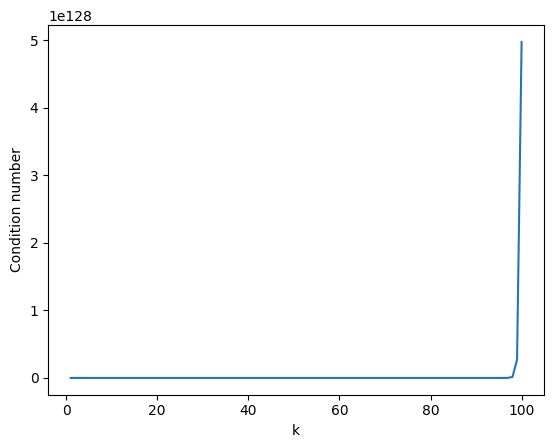

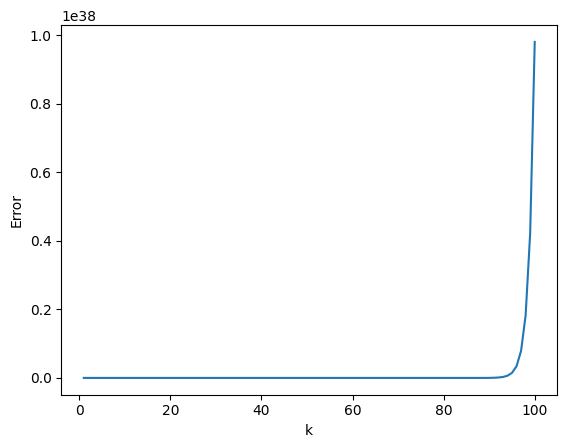

In [22]:
import matplotlib.pyplot as plt

n = 10
ks = []
cond_nums = []
errs = []

for k in range(1, 101):
    A = np.zeros((n, n))
    F = np.zeros(n)
    x_true = np.zeros(n)

    for i in range(n):
        x_true[i] = (-1) ** i * np.exp(i)
        for j in range(n):
            A[i][j] = 1 / (1 + (i + j + 1) ** k)
        F[i] = np.sum(A[i,:]) + np.sum(A[:,i])

    cond_num = np.linalg.cond(A)
    x = gaussMethod(A, F)
    err = np.linalg.norm(x - x_true)

    ks.append(k)
    cond_nums.append(cond_num)
    errs.append(err)

plt.plot(ks, cond_nums)
plt.xlabel('k')
plt.ylabel('Condition number')
plt.show()

plt.plot(ks, errs)
plt.xlabel('k')
plt.ylabel('Error')
plt.show()